### Install the PIL library

In [ ]:
!pip3 install pillow

### Upload the PIL library

In [1]:
from PIL import Image

### Load an image file

In [2]:
img = Image.open('beach.jpg')

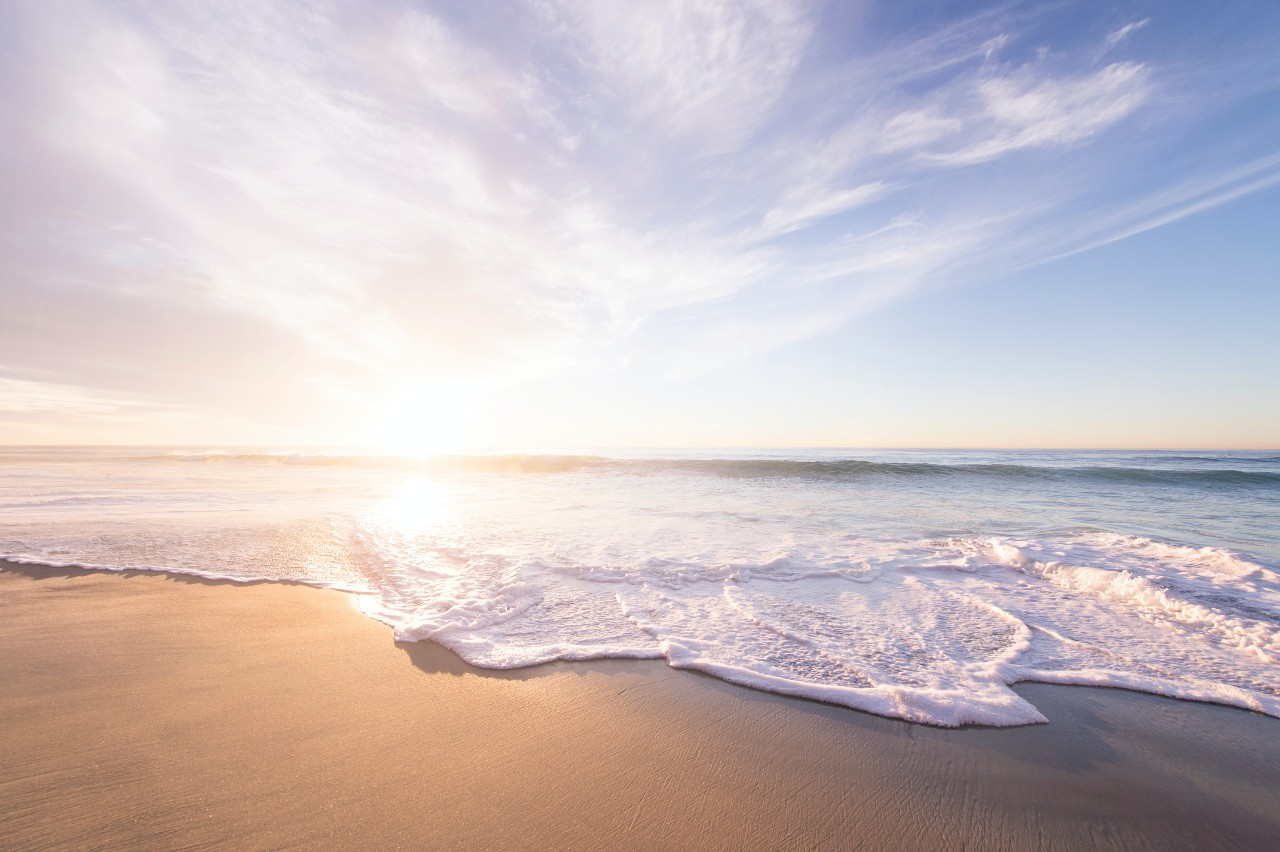

In [9]:
img

### Image properties
- **filename** - get the file name or the path of the image.
- **format** - file format of the image file like ‘JPEG’, ‘BMP’, ‘PNG’, etc.
- **mode** - get the pixel format used by the image. Typical values are “1”, “L”, “RGB” or “CMYK”.
- **size** - returns a tuple containing of height & weight of the image.
- **width** - returns only the width of the image.
- **height** - returns only the height of the image.
- **info** - returns a dictionary holding data associated with the image.
- **palette** - returns the colour palette table, if any.

In [3]:
print(img.filename)
print(img.format)
print(img.mode)
print(img.size)
print(img.width)
print(img.height)
print(img.info)
print(img.palette)

beach.jpg
JPEG
RGB
(1280, 852)
1280
852
{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}
None


### resize
The `resize` method will transform the dimensions of the image to fit the numbers we give it (in pixels) using a tuple (columns, rows)

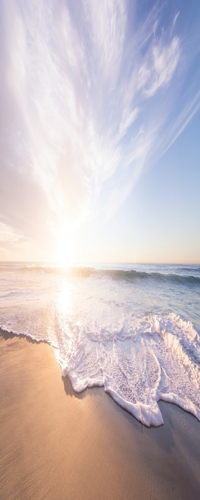

In [10]:
img.resize((200,500))

We can keep the original ratio of the image by multiplying of dividing both dimensions with the same number

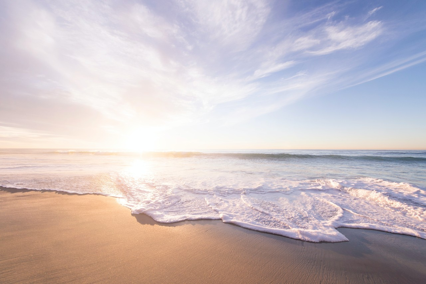

In [4]:
w = img.width
h = img.height
img = img.resize((w//3, h//3))
img

### thumbnail
Another way to avoid messing up the proportions of the image will be yo use the `thumbnail` method.
`thumbnail` will keep the axes ratio of the image but also change the actual image object (unlike resize which only display a calculated result)

In [12]:
img_thumb = img.copy() # Generate a copy of the image so we don't change the original object
img_thumb.thumbnail((300,300))
img_thumb.size

(300, 200)

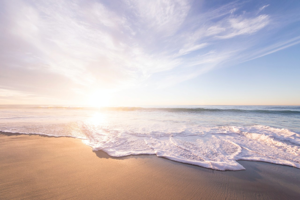

In [4]:
img_thumb

### rotate

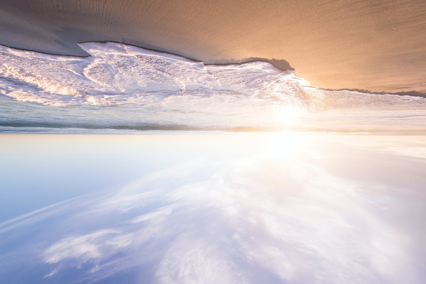

In [20]:
img.rotate(180)

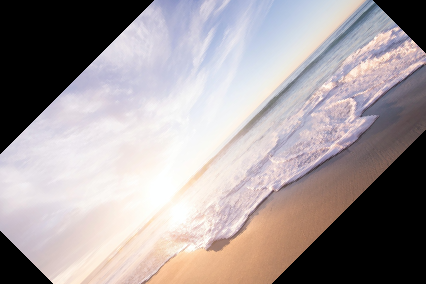

In [21]:
img.rotate(45)

### save
we can export our image object using the `save` method

In [5]:
img = img.rotate(45)
img.save('rotated_img.jpg')

### Crop
The `crop` method helps us to extract a part of an image.<br>
The part will be a rectangle in shape and in order to define it, we need to specift two points:<br>
the top left and the bottom right corners of the desired rectangle

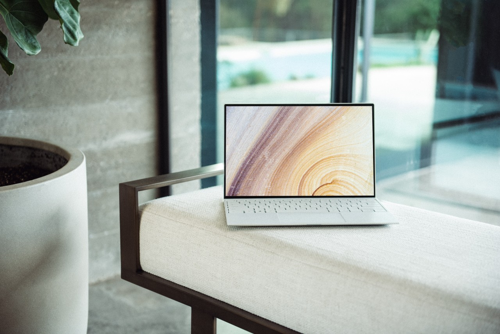

In [2]:
img = Image.open('laptop.jpg')
img.thumbnail((500, 500))
img

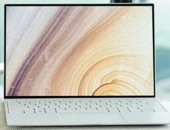

In [11]:
left = 220
top = 100
right = 390
bottom = 230
img.crop((left, top, right, bottom))

### transpose
Unlike `rotate`, transposing the picture would generate a "mirror" version of it

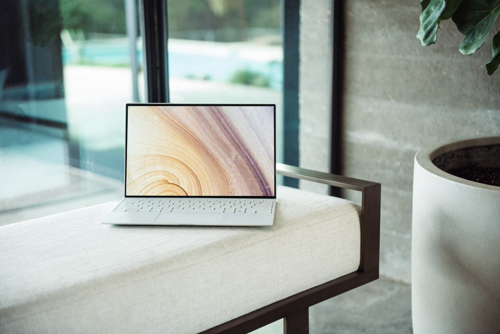

In [24]:
img.transpose(Image.FLIP_LEFT_RIGHT)

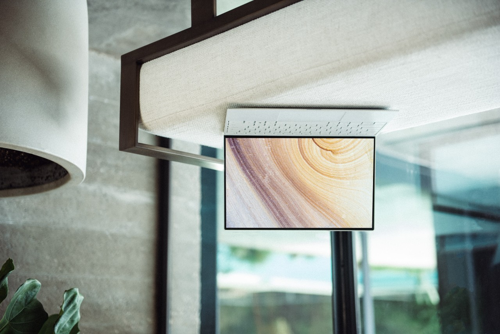

In [25]:
img.transpose(Image.FLIP_TOP_BOTTOM)

We can also use `TRANSPOSE` or `TRANSVERSE` to switch the axes of the image

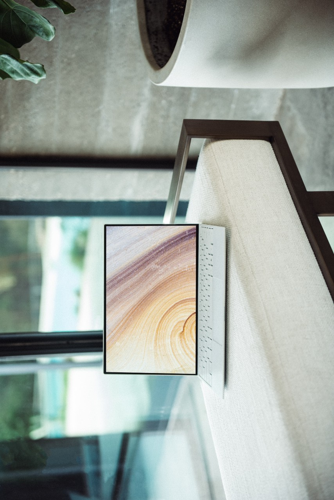

In [28]:
# img.transpose(Image.TRANSVERSE)
img.transpose(Image.TRANSPOSE)

### Mixing Color Channles
We can use the `split` method to seperate the image object into seperate RGB "channels"

In [14]:
img.split()

(<PIL.Image.Image image mode=L size=426x284 at 0x22F2AAF9E50>,
 <PIL.Image.Image image mode=L size=426x284 at 0x22F2AAF9DF0>,
 <PIL.Image.Image image mode=L size=426x284 at 0x22F2AAF95E0>)

In [15]:
r,g,b = img.split()

We can `Image.merge` them back together

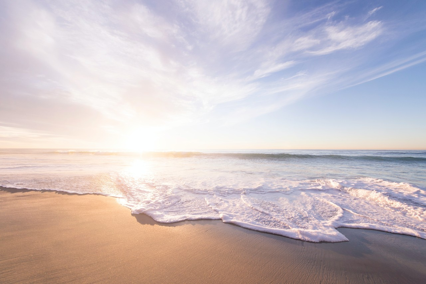

In [17]:
Image.merge('RGB', (r,g,b))

We can flip the order of the channels to create new color combinations

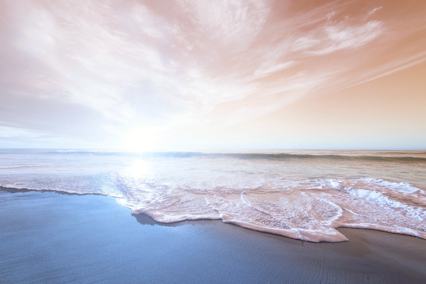

In [18]:
Image.merge('RGB', (b,g,r))

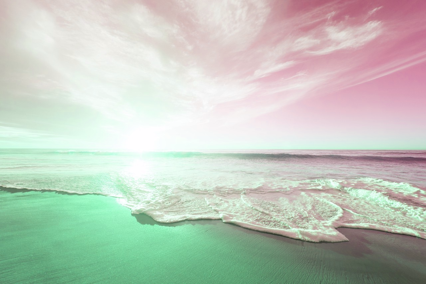

In [21]:
Image.merge('RGB', (b,r,g))

### Convert
We can use the `convert` method to turn an image to grayscale by specifying mode "L"

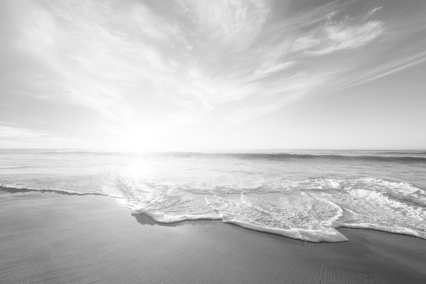

In [75]:
img.convert(mode = 'L') # additional options include RGB and CMYK

### Image Enhancments

In [23]:
from PIL import ImageEnhance as IE

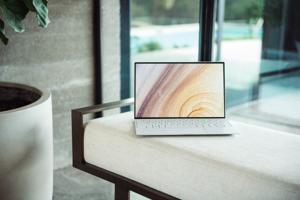

In [40]:
img = Image.open('laptop.jpg')
img.thumbnail((300,300))
img

**Brightness**

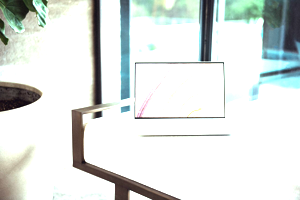

In [41]:
IE.Brightness(img).enhance(2)

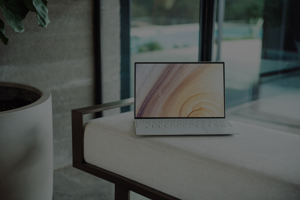

In [42]:
IE.Brightness(img).enhance(0.5)

**Contrast**

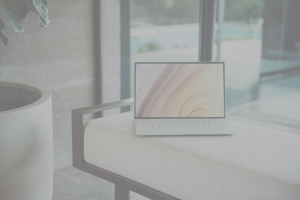

In [46]:
IE.Contrast(img).enhance(0.3)

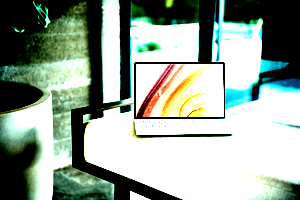

In [49]:
IE.Contrast(img).enhance(5)

**color**

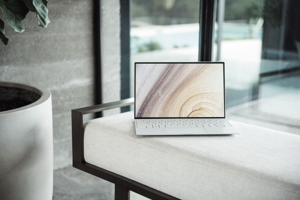

In [51]:
IE.Color(img).enhance(0.5)

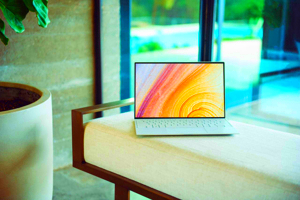

In [52]:
IE.Color(img).enhance(5)

### Blending Images
`Image.blend` will allow us to take 2 different images and blend them. <br>
The third argument is the *Alpha* amount which allows us to determine <br> the "blending rate" (0.5 will give us 50% of each)<br><br>
**Important:** The two images must share the same size and mode

In [80]:
img1 = Image.open('beach.jpg')
img1.thumbnail((300,300))
img2 = Image.open('laptop.jpg')
img2.thumbnail((300,300))

Lets display a laptop on the waves :)

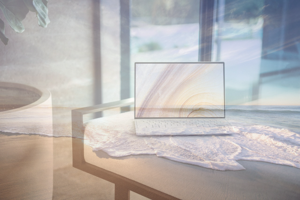

In [102]:
Image.blend(img1,img2, 0.4) # 0.4 means we are giving 60% to the first image and only 40% to the second 

### Blurring Images
We can pick from 3 different blurring options:
- BLUR
- BoxBlur
- GaussianBlur<br><br>
BLUR is the simplest and does not take any arguments:

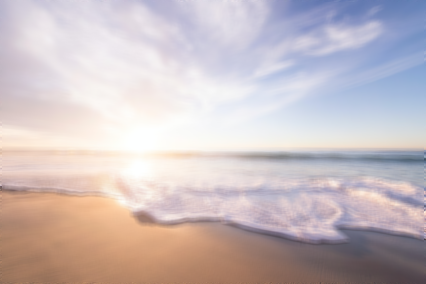

In [122]:
from PIL import ImageFilter as IF
img.filter(IF.BLUR)

In this filter, we use `radius` as parameter. Radius is directly proportional to the blur value.

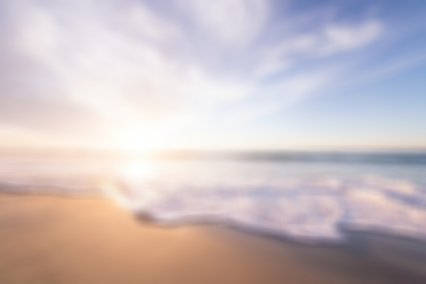

In [129]:
img.filter(IE.ImageFilter.BoxBlur(radius=5))

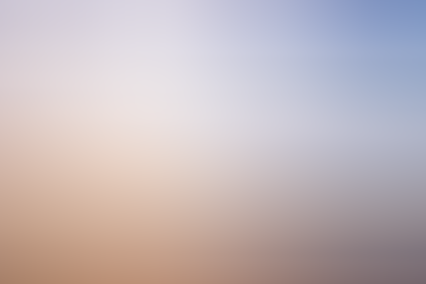

In [128]:
img.filter(IE.ImageFilter.BoxBlur(radius=100))

`GaussianBlur` also uses the `radius` argument and does the same work as box blur with some algorithmic changes

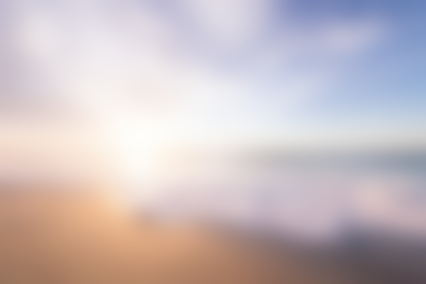

In [133]:
img.filter(IE.ImageFilter.GaussianBlur(radius=10))

### Writing on an Image

In [13]:
from PIL import ImageDraw, ImageFont

**Import font**<br>
This requires a standart `ttf` font file. <br>
There are many free sources online, I recommend <a href="https://fonts.google.com/">Google Fonts</a>

In [29]:
lobster_font = ImageFont.truetype('Lobster-Regular.ttf', 24) # Specify the font file and the desired size

Now we need to create a "draw object" using the `draw` method, which will take the original image

In [38]:
draw_obj = ImageDraw.Draw(img)

The final step will be to actually "draw" the text on the image. <br>
We can use the `text` method on our draw object

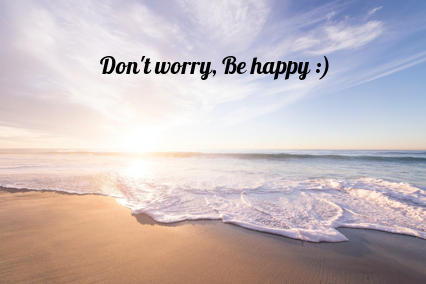

In [39]:
position = (100, 50) # This should hold the X and Y coordinates for the beginning of the text
text = 'Don\'t worry, Be happy :)'
color = '#000' # We can use RGB (tuple) or hexadecimal (str) color codes to specify the font color
draw_obj.text(position, text, color, lobster_font)
img